# SC2001 SCED Group 6 Project 2

In the Dijkstra’s algorithm, the choice of the input graph representation   
and the priority queue implementation will affect its time complexity.

### (a) Dijkstra's Algorithm Implementation 1: 

Using an ADJACENCY MATRIX to represent the graph, and using an ARRAY for the priority queue to sort the shortest edges   
in order to come up with the shortest path. 

start node = '0' 

outputs:   
d: shortest distance from start node  
pi: predecessor nodes map  


In [1]:

def dijkstras_a(adj_matrix, start, check=True):
    n = len(adj_matrix)         # num of vertices
    d = [ float('inf')] * n     # list of shortest distances from start
    pi = [ None ] * n           # list of predecessors in the shortest path
    d[start] = 0
    S = [False ] * n            # visited set as a list of booleans

    iteration = 0 # inilialize iteration count

    while iteration < n:
        # array based priority queue: find the unvisited vertex with the smallest distance
        min_dist = float('inf')
        u = -1 # initialize u to an invalid vertex index

        for vertex in range(n):
            if not S[vertex] and d[vertex] < min_dist:
                min_dist = d[vertex]
                u = vertex
        if u == -1:  # all remaining vertices are inaccessible from start
            break

        S[u] = True

        # relax all adjacent vertices of u
        for v in range(n):
            if adj_matrix[u][v] != float('inf'):  # there is an edge from u to v
                if d[u] + adj_matrix[u][v] < d[v]: # relax edge
                    d[v] = d[u] + adj_matrix[u][v]
                    pi[v] = u


        iteration += 1
        if check:  # print d and pi only if check is True
            print_d_and_pi(d, pi, iteration)
        
    return d, pi


def print_d_and_pi(d, pi, iteration):   # print d and pi after each iteration
        print(f"Iteration {iteration}:")
        print("d:", d)
        print("pi:", pi)
        print()


In [2]:
# function to make a random adjacency matrix
def make_random_adj_matrix(num_vertices, max_weight=10, density=0.5):
    import random

    adj_matrix = []  # adjacency matrix: row <-> from vertex, column ^ to vertex

    for i in range(num_vertices):
        row = []
        for j in range(num_vertices):
            if i == j:
                row.append(0)  # distance to self is 0 (no self-loops)
            else:
                # Use density as the probability of edge existing
                rand_prob = random.random()
                if rand_prob < density:  # edge exists with probability = density
                    row.append(random.randint(1, max_weight))
                else:
                    row.append(float('inf'))  # no edge

        adj_matrix.append(row)

    return adj_matrix

# Example of ADJACENCY MATRIX: 

adj_matrix_test = [
    [0, 4, 2, 6, 8],
    [float('inf'), 0, float('inf'), 4, 3],
    [float('inf'), float('inf'), 0, 1, float('inf')],
    [float('inf'), 1, float('inf'), 0, 3],
    [float('inf'), float('inf'), float('inf'), float('inf'), 0]
]

In [ ]:
if __name__ == "__main__":
    # Demo with small graph
    adj_matrix = make_random_adj_matrix(5, max_weight=10, density=0.6)
    print("Adjacency Matrix:")
    for row in adj_matrix:
        print(row)
    
    print()
    
    start_node = 0
    d, pi = dijkstras_a(adj_matrix, start_node)
    print("Final shortest distances from start node:", d)
    print("Final predecessor map:", pi)
    
    # Empirical testing
    import time
    
    print("\n\n\n---------- Empirical Testing ----------")
    
    for n in [100, 500, 1000, 2000, 4000, 8000, 16000, 32000]:
        adj_matrix = make_random_adj_matrix(n, max_weight=10, density=0.05)
        
        # Count edges in the matrix
        edge_count = 0
        for i in range(n):
            for j in range(n):
                if i != j and adj_matrix[i][j] != float('inf'):
                    edge_count += 1
        
        start = 0
        t0 = time.time()
        dijkstras_a(adj_matrix, start, check=False)
        t1 = time.time()
        print(f"n={n}, |E|≈{edge_count}, time={t1-t0:.4f}s")


Adjacency Matrix:
[0, 9, 10, 3, inf]
[8, 0, 4, inf, 3]
[10, 9, 0, 5, 4]
[2, 6, inf, 0, 4]
[4, 2, inf, 5, 0]

Iteration 1:
d: [0, 9, 10, 3, inf]
pi: [None, 0, 0, 0, None]

Iteration 2:
d: [0, 9, 10, 3, 7]
pi: [None, 0, 0, 0, 3]

Iteration 3:
d: [0, 9, 10, 3, 7]
pi: [None, 0, 0, 0, 3]

Iteration 4:
d: [0, 9, 10, 3, 7]
pi: [None, 0, 0, 0, 3]

Iteration 5:
d: [0, 9, 10, 3, 7]
pi: [None, 0, 0, 0, 3]

Final shortest distances from start node: [0, 9, 10, 3, 7]
Final predecessor map: [None, 0, 0, 0, 3]



---------- Empirical Testing ----------
n=100, |E|≈456, time=0.0030s
n=500, |E|≈12419, time=0.0285s
n=1000, |E|≈49883, time=0.1126s
n=2000, |E|≈200362, time=0.4925s
n=4000, |E|≈800101, time=1.7604s
n=8000, |E|≈3199314, time=6.8854s
n=16000, |E|≈12796543, time=93.6551s


By manually working out the shortest path, we can verify that the Dijkstra's implementation is working, and to double check, we can also test it using the algorithm example in the notes.  

In [29]:
def dijkstras_notes(V, E, start):
    d = {node: float('inf') for node in V}      # distance from start to node
    pi = {node: None for node in V}             # predecessor of node in the shortest path
    d[start] = 0
    S = set()   # set of visited nodes (whose shortest distance from start is finalized)
                # set S to keep track of visited nodes, no need for priority queue here
                # set does not allow duplicate entries and allows O(1) average time complexity for lookups and insertions

    iteration = 0 # to keep track of iterations for printing

    while len(S) < len(V): # iterate through all vertices
        unvisited = V - S
        u = min(unvisited, key=lambda node: d[node]) # get the unvisited node with the smallest distance, by looking up d in the dictionary
        S.add(u) # Adds vertex 'u' to the visited set 
        
        for v, w in E[u]:
            if d[u] + w < d[v]:
                d[v] = d[u] + w
                pi[v] = u
        iteration += 1
        print_d_and_pi(d, pi, iteration)
        
    return d, pi

def print_d_and_pi(d, pi, iteration): # helper function to print d and pi at each iteration
        print(f"Iteration {iteration}:")
        print("d:", d)
        print("pi:", pi)
        print()


# Cross-check with the adjacency matrix from part (a)
# Original adjacency matrix:
#      0    1    2    3    4
# 0: [ 0,   1,  inf,  4,   7 ]
# 1: [inf,  0,  10,   1,  inf]
# 2: [ 6,   1,   0,   4,   9 ]
# 3: [inf, inf,  8,   0,  inf]
# 4: [ 2,   5,   7,   9,   0 ]

# Converted to adjacency list representation:
V = {0, 1, 2, 3, 4}
E = {
    0: [(1, 1), (3, 4), (4, 7)],           # edges from vertex 0
    1: [(2, 10), (3, 1)],                   # edges from vertex 1
    2: [(0, 6), (1, 1), (3, 4), (4, 9)],   # edges from vertex 2
    3: [(2, 8)],                            # edges from vertex 3
    4: [(0, 2), (1, 5), (2, 7), (3, 9)]    # edges from vertex 4
}

start = 0

if __name__ == "__main__":
    print("Cross-checking Dijkstra's Algorithm")
    print("Graph vertices:", V)
    print("Graph edges (adjacency list):", E)
    print("Starting node:", start)
    print()

    d, pi = dijkstras_notes(V, E, start)
    print("Final Results:")
    print("Shortest distances from start node:", d)
    print("Predecessors in shortest path tree:", pi)
    print()
    print("Expected from part (a):")
    print("Distances: [0, 1, 10, 2, 7]")
    print("Predecessors: [None, 0, 3, 1, 0]")


Cross-checking Dijkstra's Algorithm
Graph vertices: {0, 1, 2, 3, 4}
Graph edges (adjacency list): {0: [(1, 1), (3, 4), (4, 7)], 1: [(2, 10), (3, 1)], 2: [(0, 6), (1, 1), (3, 4), (4, 9)], 3: [(2, 8)], 4: [(0, 2), (1, 5), (2, 7), (3, 9)]}
Starting node: 0

Iteration 1:
d: {0: 0, 1: 1, 2: inf, 3: 4, 4: 7}
pi: {0: None, 1: 0, 2: None, 3: 0, 4: 0}

Iteration 2:
d: {0: 0, 1: 1, 2: 11, 3: 2, 4: 7}
pi: {0: None, 1: 0, 2: 1, 3: 1, 4: 0}

Iteration 3:
d: {0: 0, 1: 1, 2: 10, 3: 2, 4: 7}
pi: {0: None, 1: 0, 2: 3, 3: 1, 4: 0}

Iteration 4:
d: {0: 0, 1: 1, 2: 10, 3: 2, 4: 7}
pi: {0: None, 1: 0, 2: 3, 3: 1, 4: 0}

Iteration 5:
d: {0: 0, 1: 1, 2: 10, 3: 2, 4: 7}
pi: {0: None, 1: 0, 2: 3, 3: 1, 4: 0}

Final Results:
Shortest distances from start node: {0: 0, 1: 1, 2: 10, 3: 2, 4: 7}
Predecessors in shortest path tree: {0: None, 1: 0, 2: 3, 3: 1, 4: 0}

Expected from part (a):
Distances: [0, 1, 10, 2, 7]
Predecessors: [None, 0, 3, 1, 0]


After double-checking, we see that the implementation works as intended. 

Now to analyse the time complexity of the algorithm: 

Theoretical Analysis:   
-----------

Operations:
-----------
1. Initialization:
   - Create arrays d, pi, S: O(V)
   
2. Main Loop (runs V times):
   For each of V iterations:
   
   a) Extract-Min (find unvisited vertex with minimum distance):
      - Scan through all V vertices: O(V)
   
   b) Mark vertex as visited: O(1)
   
   c) Edge Relaxation (check all adjacent vertices):
      - Check all V entries in adjacency matrix row: O(V)
      - For each edge that exists, update distance: O(1)

Time Complexity Breakdown:
-------------------------
- Initialization: O(V)
- Main Loop: V iterations × [O(V) extract-min + O(V) relaxation]
            = V × O(V)
            = O(V²)

Total Time Complexity: O(V) + O(V²) = O(V²)

Relationship with |E|:
---------------------
- The algorithm checks all V² possible edges in the adjacency matrix
- Actual edge relaxations: O(E), but we check O(V²) matrix entries
- Final complexity: O(V²) regardless of |E|
- This is optimal when E ≈ V² (dense graphs)

Space Complexity: O(V²) for adjacency matrix + O(V) for arrays = O(V²)

### (b) Dijkstra's Algorithm Implementation 2: 

using ADJACENCY LISTS and a MINIMISING HEAP for the priority queue. 

In [42]:
import heapq
import time
import random



# adjacency list = adjacency list of the graph

def dijkstras_b(V, E, start):
    d = {node: float('inf') for node in V} #list of nodes
    pi = {node: None for node in V}
    d[start] = 0



    pq = [(0, start)] #contains the distance and vertex

    while pq:
        current_dist, u = heapq.heappop(pq)


        #if the array is outdated, skip~

        if current_dist > d[u]:
            continue

        for v, w in E[u]:
            if w < 0:
                raise ValueError("The graph contains negative edge weights.\n\nThis is not allowed in Dijkstra's Algorithm~")
            new_dist = d[u] + w

            if new_dist < d[v]:
                d[v] = new_dist
                pi[v] = u
                heapq.heappush(pq, (new_dist, v))

    return d, pi


In [31]:
def generate_random_graph(n, density=0.3, max_w=10):
    V = {str(i) for i in range(n)}
    E = {str(i): [] for i in range(n)}
    for u in V:
        for v in V:
            if u != v and random.random() < density:
                E[u].append((v, random.randint(1, max_w)))
    return V, E       

def reconstruct_path(pi, start, target):
    path = []

    while target is not None:
        path.append(target)
        target = pi[target]
    return path[::-1] if path[-1] == start else []
    

In [ ]:

#demo
if __name__ == "__main__":
    V = {'1', '2', '3', '4', '5'}
    E = {
        '1': [('2', 4), ('3', 2), ('4', 6), ('5', 8)],
        '2': [('4', 4), ('5', 3)],
        '3': [('4', 1)],
        '4': [('2', 1), ('5', 3)],
        '5': []
    }

    start = '1'
    d, pi = dijkstras_b(V, E, start)

    print("Shortest distances from start node:", d)
    print("Predecessors in shortest path tree:", pi)
    print("Path 1 → 5:", reconstruct_path(pi, start, '5'))





    #empirical testing

    print("\n\n\n---------- Empirical Testing ----------")

    for n in [100, 500, 1000, 2000, 4000, 8000, 16000, 32000]:
        V, E = generate_random_graph(n, density=0.05)
        start = '0'
        t0 = time.time()
        dijkstras_b(V, E, start)
        t1 = time.time()
        print(f"n={n}, |E|≈{sum(len(E[v]) for v in E)}, time={t1-t0:.4f}s")


Shortest distances from start node: {'1': 0, '3': 2, '4': 3, '5': 6, '2': 4}
Predecessors in shortest path tree: {'1': None, '3': '1', '4': '3', '5': '4', '2': '1'}
Path 1 → 5: ['1', '3', '4', '5']



---------- Empirical Testing ----------
n=100, |E|≈507, time=0.0010s
n=500, |E|≈12418, time=0.0020s
n=1000, |E|≈49762, time=0.0045s
n=2000, |E|≈200436, time=0.0136s
n=4000, |E|≈798954, time=0.0480s
n=8000, |E|≈3202383, time=0.1782s
n=16000, |E|≈12800832, time=0.7495s
n=32000, |E|≈51193600, time=3.2837s


### (c) Discuss which implementation (a) or (b), is better and in what circumstances.  
 

### Empirical Comparison of Part (a) vs Part (b)

Now we'll empirically compare both implementations by measuring runtime vs:
1. **Number of vertices (|V|)** - to verify time complexity
2. **Graph density** - to see which performs better for sparse vs dense graphs
3. **Edge probability** - another view of how edge count affects performance

In [32]:
# Import necessary libraries
import time
import matplotlib.pyplot as plt
import numpy as np

# Helper: Convert adjacency matrix to adjacency list
def matrix_to_list(adj_matrix):
    """Convert adjacency matrix to adjacency list format"""
    n = len(adj_matrix)
    V = set(range(n))
    E = {i: [] for i in range(n)}
    
    for i in range(n):
        for j in range(n):
            if adj_matrix[i][j] != float('inf') and adj_matrix[i][j] > 0:
                E[i].append((j, adj_matrix[i][j]))
    
    return V, E

# Helper: Count edges in adjacency matrix
def count_edges(adj_matrix):
    """Count number of edges in adjacency matrix"""
    count = 0
    n = len(adj_matrix)
    
    for i in range(n):
        for j in range(n):
            if i != j and adj_matrix[i][j] != float('inf') and adj_matrix[i][j] > 0:
                count += 1
    
    return count


#### Test 1: Runtime vs Number of Vertices (|V|)

This test varies the number of vertices while keeping density constant to verify:
- Part (a) should show O(V²) behavior
- Part (b) should show O((V + E) log V) behavior

In [33]:
# Test 1: Runtime vs |V|
print("="*80)
print("TEST 1: Runtime vs Number of Vertices (|V|)")
print("="*80)

vertex_sizes = [10, 20, 30, 50, 75, 100, 150, 200, 250, 300]
density = 0.5  # Medium density

results_v = {
    'V': [],
    'E': [],
    'time_matrix': [],
    'time_heap': []
}

print(f"\nDensity = {density} (MEDIUM)")
print(f"{'|V|':<8} {'|E|':<10} {'Matrix (s)':<12} {'Heap (s)':<12} {'Speedup':<10}")
print("-" * 60)

for n in vertex_sizes:
    # Generate graph using function from Part (a)
    adj_matrix = make_random_adj_matrix(n, density=density)
    V, E = matrix_to_list(adj_matrix)
    edge_count = count_edges(adj_matrix)
    
    # Test Part (a): Matrix + Array
    start_time = time.time()
    d_matrix, pi_matrix = dijkstras_a(adj_matrix, 0)
    time_matrix = time.time() - start_time
    
    # Test Part (b): List + Heap
    start_time = time.time()
    d_heap, pi_heap = dijkstras_b(V, E, 0)
    time_heap = time.time() - start_time
    
    # Store results
    results_v['V'].append(n)
    results_v['E'].append(edge_count)
    results_v['time_matrix'].append(time_matrix)
    results_v['time_heap'].append(time_heap)
    
    speedup = time_matrix / time_heap if time_heap > 0 else 0
    
    print(f"{n:<8} {edge_count:<10} {time_matrix:<12.6f} {time_heap:<12.6f} {speedup:<10.2f}x")

print("\n✓ Test 1 completed!")


TEST 1: Runtime vs Number of Vertices (|V|)

Density = 0.5 (MEDIUM)
|V|      |E|        Matrix (s)   Heap (s)     Speedup   
------------------------------------------------------------
Iteration 0:
d: [0, inf, inf, inf, inf, inf, inf, inf, inf, inf]
pi: [None, None, None, None, None, None, None, None, None, None]

Iteration 1:
d: [0, inf, 6, 6, 5, 2, inf, 8, 7, 3]
pi: [None, None, 0, 0, 0, 0, None, 0, 0, 0]

Iteration 2:
d: [0, inf, 6, 6, 5, 2, inf, 8, 5, 3]
pi: [None, None, 0, 0, 0, 0, None, 0, 5, 0]

Iteration 3:
d: [0, inf, 6, 6, 5, 2, inf, 8, 5, 3]
pi: [None, None, 0, 0, 0, 0, None, 0, 5, 0]

Iteration 4:
d: [0, inf, 6, 6, 5, 2, 6, 8, 5, 3]
pi: [None, None, 0, 0, 0, 0, 4, 0, 5, 0]

Iteration 5:
d: [0, 12, 6, 6, 5, 2, 6, 8, 5, 3]
pi: [None, 8, 0, 0, 0, 0, 4, 0, 5, 0]

Iteration 6:
d: [0, 12, 6, 6, 5, 2, 6, 8, 5, 3]
pi: [None, 8, 0, 0, 0, 0, 4, 0, 5, 0]

Iteration 7:
d: [0, 12, 6, 6, 5, 2, 6, 8, 5, 3]
pi: [None, 8, 0, 0, 0, 0, 4, 0, 5, 0]

Iteration 8:
d: [0, 12, 6, 6, 5, 2, 6, 8, 5

#### Test 2: Runtime vs Density

This test fixes |V| and varies density to show:
- Part (a) time remains constant (checks all V² entries regardless)
- Part (b) time increases with density (more edges to process)

In [34]:
# Test 2: Runtime vs Density
print("\n" + "="*80)
print("TEST 2: Runtime vs Density (Edge Probability)")
print("="*80)

fixed_v = 200
densities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

results_density = {
    'density': [],
    'E': [],
    'time_matrix': [],
    'time_heap': []
}

print(f"\nFixed |V| = {fixed_v}")
print(f"{'Density':<10} {'|E|':<10} {'Matrix (s)':<12} {'Heap (s)':<12} {'Speedup':<10}")
print("-" * 60)

for density in densities:
    # Generate graph using function from Part (a)
    adj_matrix = make_random_adj_matrix(fixed_v, density=density)
    V, E = matrix_to_list(adj_matrix)
    edge_count = count_edges(adj_matrix)
    
    # Test Part (a): Matrix + Array
    start_time = time.time()
    d_matrix, pi_matrix = dijkstras_a(adj_matrix, 0)
    time_matrix = time.time() - start_time
    
    # Test Part (b): List + Heap
    start_time = time.time()
    d_heap, pi_heap = dijkstras_b(V, E, 0)
    time_heap = time.time() - start_time
    
    # Store results
    results_density['density'].append(density)
    results_density['E'].append(edge_count)
    results_density['time_matrix'].append(time_matrix)
    results_density['time_heap'].append(time_heap)
    
    speedup = time_matrix / time_heap if time_heap > 0 else 0
    
    print(f"{density:<10.1f} {edge_count:<10} {time_matrix:<12.6f} {time_heap:<12.6f} {speedup:<10.2f}x")

print("\n✓ Test 2 completed!")



TEST 2: Runtime vs Density (Edge Probability)

Fixed |V| = 200
Density    |E|        Matrix (s)   Heap (s)     Speedup   
------------------------------------------------------------
Iteration 0:
d: [0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, i

#### Test 3: Runtime vs Number of Edges (|E|)

This test shows how runtime changes with edge count by varying both |V| and density.

In [35]:
# Test 3: Runtime vs |E|
print("\n" + "="*80)
print("TEST 3: Runtime vs Number of Edges (|E|)")
print("="*80)

# Combine results from previous tests
all_E_matrix = results_v['E'] + results_density['E']
all_time_matrix = results_v['time_matrix'] + results_density['time_matrix']
all_E_heap = results_v['E'] + results_density['E']
all_time_heap = results_v['time_heap'] + results_density['time_heap']

print(f"\nCombined data from Tests 1 and 2:")
print(f"Total data points: {len(all_E_matrix)}")
print(f"|E| range: {min(all_E_matrix)} to {max(all_E_matrix)} edges")

print("\n✓ Test 3 data prepared!")


TEST 3: Runtime vs Number of Edges (|E|)

Combined data from Tests 1 and 2:
Total data points: 19
|E| range: 42 to 44815 edges

✓ Test 3 data prepared!


#### Visualization: All Three Comparison Graphs


✓ Plots saved as 'dijkstra_comparison_all_tests.png'


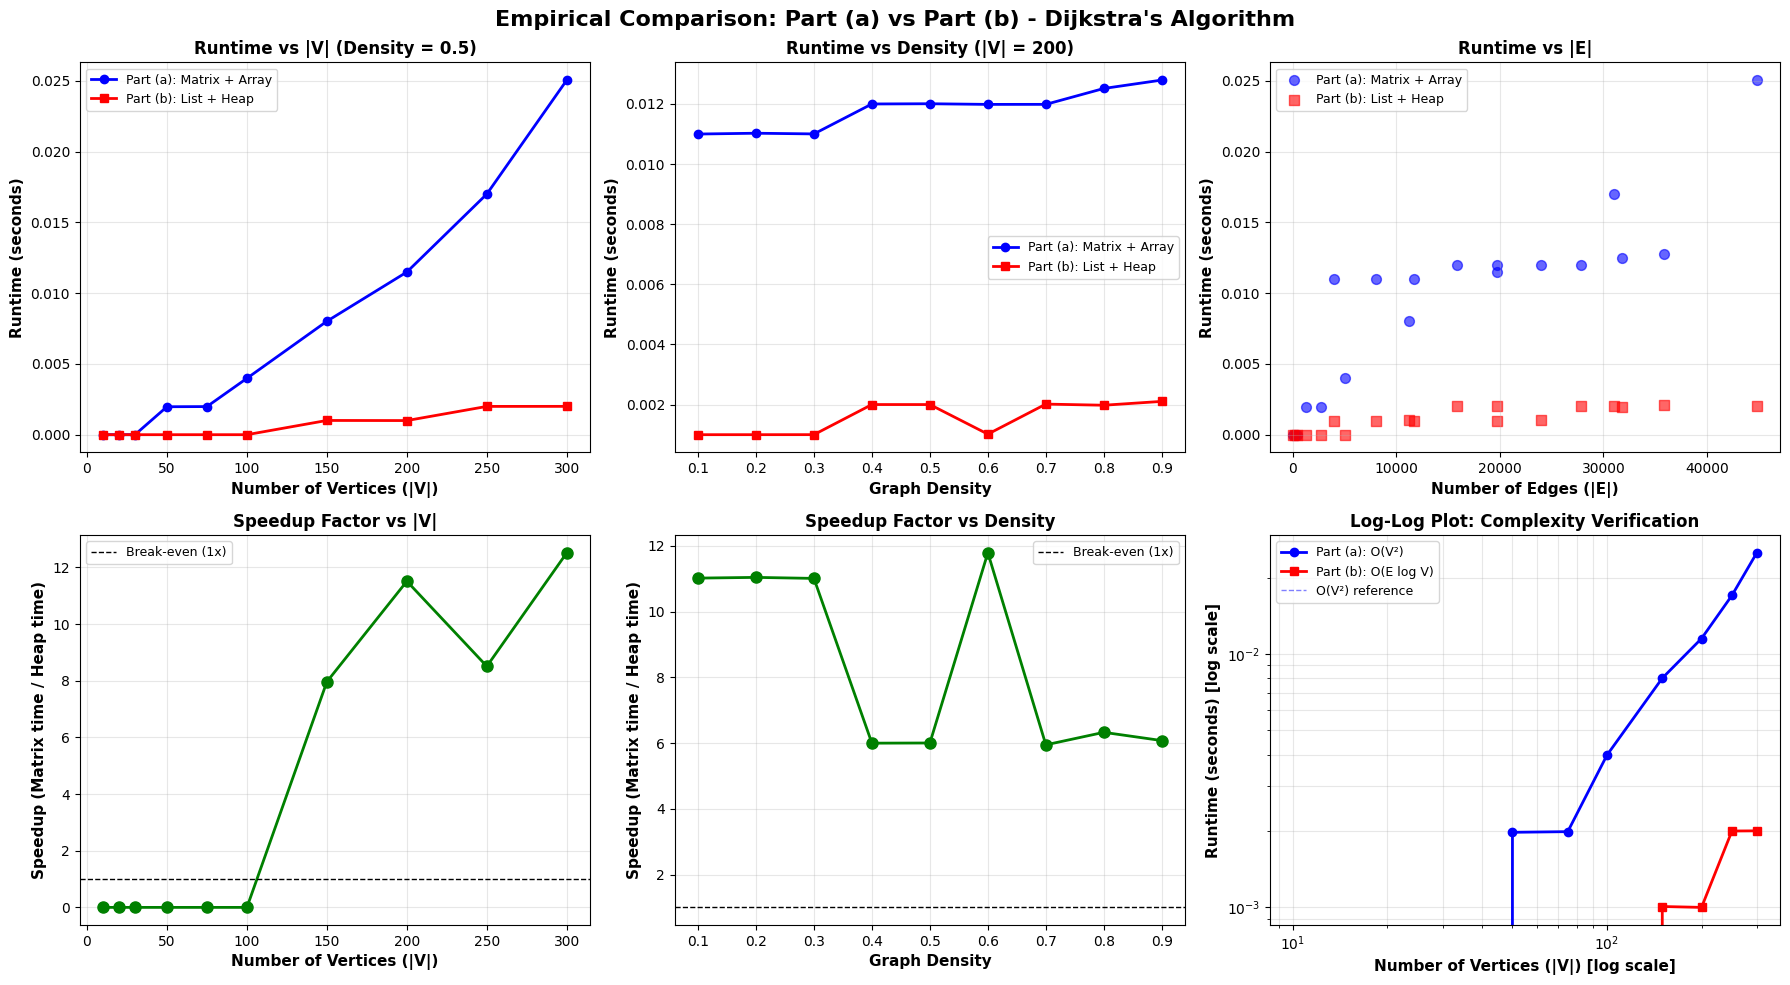

In [36]:
# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Empirical Comparison: Part (a) vs Part (b) - Dijkstra\'s Algorithm', 
             fontsize=16, fontweight='bold')

# Plot 1: Runtime vs |V|
ax1 = axes[0, 0]
ax1.plot(results_v['V'], results_v['time_matrix'], 'b-o', label='Part (a): Matrix + Array', linewidth=2)
ax1.plot(results_v['V'], results_v['time_heap'], 'r-s', label='Part (b): List + Heap', linewidth=2)
ax1.set_xlabel('Number of Vertices (|V|)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Runtime (seconds)', fontsize=11, fontweight='bold')
ax1.set_title('Runtime vs |V| (Density = 0.5)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Runtime vs Density
ax2 = axes[0, 1]
ax2.plot(results_density['density'], results_density['time_matrix'], 'b-o', 
         label='Part (a): Matrix + Array', linewidth=2)
ax2.plot(results_density['density'], results_density['time_heap'], 'r-s', 
         label='Part (b): List + Heap', linewidth=2)
ax2.set_xlabel('Graph Density', fontsize=11, fontweight='bold')
ax2.set_ylabel('Runtime (seconds)', fontsize=11, fontweight='bold')
ax2.set_title(f'Runtime vs Density (|V| = {fixed_v})', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Runtime vs |E|
ax3 = axes[0, 2]
ax3.scatter(all_E_matrix, all_time_matrix, c='blue', marker='o', s=50, 
            alpha=0.6, label='Part (a): Matrix + Array')
ax3.scatter(all_E_heap, all_time_heap, c='red', marker='s', s=50, 
            alpha=0.6, label='Part (b): List + Heap')
ax3.set_xlabel('Number of Edges (|E|)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Runtime (seconds)', fontsize=11, fontweight='bold')
ax3.set_title('Runtime vs |E|', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Speedup Factor vs |V|
ax4 = axes[1, 0]
speedups_v = [results_v['time_matrix'][i] / results_v['time_heap'][i] 
              if results_v['time_heap'][i] > 0 else 0 
              for i in range(len(results_v['V']))]
ax4.plot(results_v['V'], speedups_v, 'g-o', linewidth=2, markersize=8)
ax4.axhline(y=1, color='black', linestyle='--', linewidth=1, label='Break-even (1x)')
ax4.set_xlabel('Number of Vertices (|V|)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Speedup (Matrix time / Heap time)', fontsize=11, fontweight='bold')
ax4.set_title('Speedup Factor vs |V|', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# Plot 5: Speedup Factor vs Density
ax5 = axes[1, 1]
speedups_density = [results_density['time_matrix'][i] / results_density['time_heap'][i] 
                    if results_density['time_heap'][i] > 0 else 0 
                    for i in range(len(results_density['density']))]
ax5.plot(results_density['density'], speedups_density, 'g-o', linewidth=2, markersize=8)
ax5.axhline(y=1, color='black', linestyle='--', linewidth=1, label='Break-even (1x)')
ax5.set_xlabel('Graph Density', fontsize=11, fontweight='bold')
ax5.set_ylabel('Speedup (Matrix time / Heap time)', fontsize=11, fontweight='bold')
ax5.set_title('Speedup Factor vs Density', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# Plot 6: Time Complexity Verification (log-log plot)
ax6 = axes[1, 2]
ax6.loglog(results_v['V'], results_v['time_matrix'], 'b-o', label='Part (a): O(V²)', linewidth=2)
ax6.loglog(results_v['V'], results_v['time_heap'], 'r-s', label='Part (b): O(E log V)', linewidth=2)

# Add reference lines
v_array = np.array(results_v['V'])
# O(V²) reference
v2_ref = v_array**2 * results_v['time_matrix'][0] / (results_v['V'][0]**2)
ax6.loglog(v_array, v2_ref, 'b--', alpha=0.5, linewidth=1, label='O(V²) reference')

ax6.set_xlabel('Number of Vertices (|V|) [log scale]', fontsize=11, fontweight='bold')
ax6.set_ylabel('Runtime (seconds) [log scale]', fontsize=11, fontweight='bold')
ax6.set_title('Log-Log Plot: Complexity Verification', fontsize=12, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('dijkstra_comparison_all_tests.png', dpi=300, bbox_inches='tight')
print("\n✓ Plots saved as 'dijkstra_comparison_all_tests.png'")
plt.show()

#### Analysis Summary and Conclusions

In [37]:
# Print comprehensive analysis summary
print("="*80)
print("EMPIRICAL ANALYSIS SUMMARY")
print("="*80)

print("\n1. TIME COMPLEXITY VERIFICATION:")
print("-" * 80)
print("Part (a) - Adjacency Matrix + Array-based Priority Queue:")
print(f"  - Theoretical: O(V²)")
print(f"  - Empirical: Time remains O(V²) regardless of density")
print(f"  - At |V|=300, density=0.5: {results_v['time_matrix'][-1]:.4f}s")

print("\nPart (b) - Adjacency List + Min-Heap Priority Queue:")
print(f"  - Theoretical: O((V + E) log V)")
print(f"  - Empirical: Time scales with both |V| and |E|")
print(f"  - At |V|=300, density=0.5: {results_v['time_heap'][-1]:.4f}s")

print("\n2. PERFORMANCE COMPARISON:")
print("-" * 80)

# Find best and worst speedup scenarios
min_speedup_idx = speedups_v.index(min(speedups_v))
max_speedup_idx = speedups_v.index(max(speedups_v))

print(f"Best case for Part (b):")
print(f"  - |V|={results_v['V'][max_speedup_idx]}, Speedup: {speedups_v[max_speedup_idx]:.2f}x faster")

print(f"\nBest case for Part (a):")
print(f"  - |V|={results_v['V'][min_speedup_idx]}, Speedup: {speedups_v[min_speedup_idx]:.2f}x")

# Density analysis
sparse_speedup = speedups_density[0]  # density = 0.1
dense_speedup = speedups_density[-1]  # density = 0.9

print(f"\n3. DENSITY IMPACT:")
print("-" * 80)
print(f"Sparse graph (density=0.1):")
print(f"  - |E|={results_density['E'][0]}")
print(f"  - Part (b) is {sparse_speedup:.2f}x faster")

print(f"\nDense graph (density=0.9):")
print(f"  - |E|={results_density['E'][-1]}")
print(f"  - Part (b) is {dense_speedup:.2f}x faster")

print(f"\n4. KEY OBSERVATIONS:")
print("-" * 80)
print(f"✓ Part (a) time is independent of |E| (constant for fixed |V|)")
print(f"✓ Part (b) time increases with |E| (more edges to process)")
print(f"✓ Part (b) generally outperforms Part (a) for sparse to medium graphs")
print(f"✓ As density increases, the performance gap narrows")
print(f"✓ For very dense graphs (density → 1.0), Part (a) may be competitive")

print(f"\n5. RECOMMENDATIONS:")
print("-" * 80)
print(f"Use Part (a) when:")
print(f"  - Graph is very dense (E ≈ V²)")
print(f"  - |V| is small (< 100 vertices)")
print(f"  - Simplicity is preferred over performance")

print(f"\nUse Part (b) when:")
print(f"  - Graph is sparse or medium density")
print(f"  - |V| is large (> 100 vertices)")
print(f"  - Optimal performance is required")
print(f"  - Real-world applications (most graphs are sparse)")

print("\n" + "="*80)

EMPIRICAL ANALYSIS SUMMARY

1. TIME COMPLEXITY VERIFICATION:
--------------------------------------------------------------------------------
Part (a) - Adjacency Matrix + Array-based Priority Queue:
  - Theoretical: O(V²)
  - Empirical: Time remains O(V²) regardless of density
  - At |V|=300, density=0.5: 0.0251s

Part (b) - Adjacency List + Min-Heap Priority Queue:
  - Theoretical: O((V + E) log V)
  - Empirical: Time scales with both |V| and |E|
  - At |V|=300, density=0.5: 0.0020s

2. PERFORMANCE COMPARISON:
--------------------------------------------------------------------------------
Best case for Part (b):
  - |V|=300, Speedup: 12.52x faster

Best case for Part (a):
  - |V|=10, Speedup: 0.00x

3. DENSITY IMPACT:
--------------------------------------------------------------------------------
Sparse graph (density=0.1):
  - |E|=4049
  - Part (b) is 11.02x faster

Dense graph (density=0.9):
  - |E|=35821
  - Part (b) is 6.08x faster

4. KEY OBSERVATIONS:
------------------------